In [106]:
!pip install -q pandas matplotlib

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from google.colab import drive

In [109]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessed Food Stocks Time Series Data

In [110]:
all_stocks_and_etfs_path = "/content/drive/MyDrive/Citadel Datathon/Datathon Data/all_stock_and_etfs.csv"

# Reading the file
with open(all_stocks_and_etfs_path, 'r') as file:
    content = file.read()

In [111]:
df = pd.read_csv(all_stocks_and_etfs_path)
df = df[['Date-Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ticker_Symbol']]

# Object to datetime64
df["Date-Time"] = df["Date-Time"].astype("datetime64[ns]")
df.set_index("Date-Time")

,Open,High,Low,Close,Volume,Ticker_Symbol
Date-Time,,,,,,
2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL
...,...,...,...,...,...,...
1999-11-05,9.25,9.5000,9.2500,9.50,2300,ALG
1999-11-04,9.31,9.4400,9.3100,9.31,1100,ALG
1999-11-03,9.00,9.2500,9.0000,9.19,35000,ALG


In [112]:
# Group the data by ticker
grouped = df.groupby('Ticker_Symbol')
# print(grouped.head())

tickers_subset = df['Ticker_Symbol'].unique()
preprocessed_tickers =  tickers_subset

# Access groups for the subset
subset_groups = {ticker: grouped.get_group(ticker) for ticker in tickers_subset}

# preprocessed_data = subset_groups
# # print(preprocessed_data)

In [113]:
print(preprocessed_tickers)

['HRL' 'VOO' 'ADM' 'AGCO' 'DIA' 'PEP' 'QSR' 'TSCO' 'ONEQ' 'PPC' 'CAG'
 'DRI' 'HSY' 'CAT' 'SBUX' 'CMG' 'COKE' 'CNHI' 'SPY' 'DE' 'TSN' 'GIS' 'WEN'
 'YUM' 'VMI' 'MCD' 'SAP' 'DPZ' 'ALG']


## Naive Plot

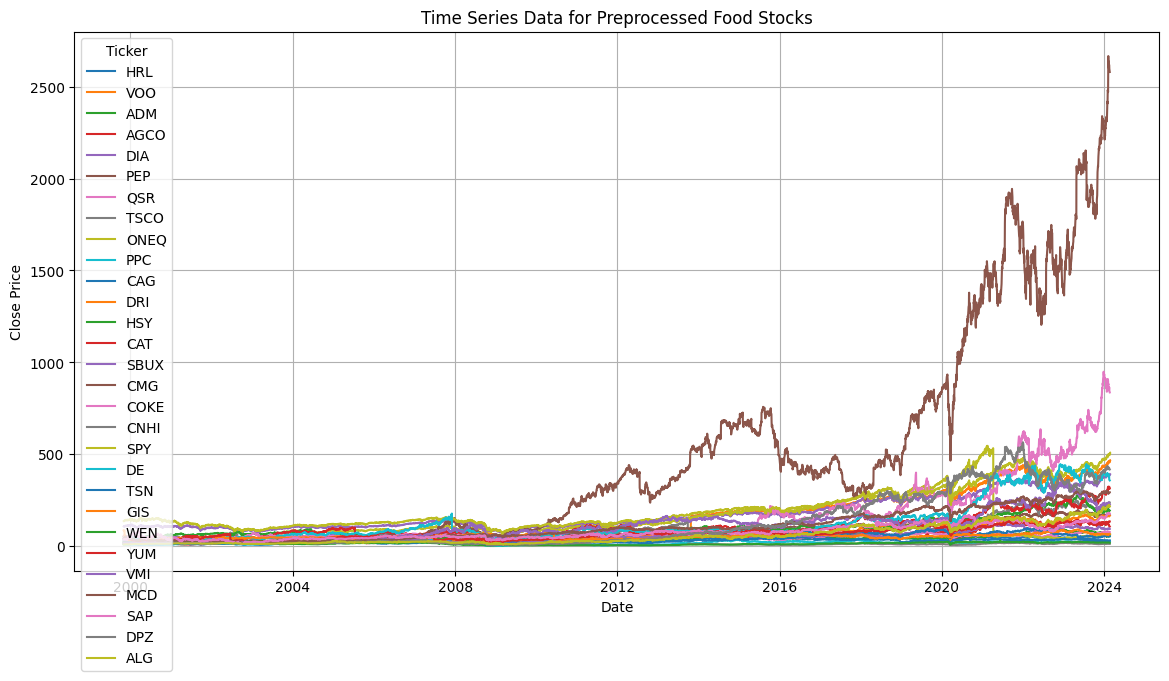

In [114]:
# Plot the data
plt.figure(figsize=(14, 7))

for name, group in subset_groups.items():
    plt.plot(group['Date-Time'], group['Close'], label=name)

# Customize the plot
plt.title('Time Series Data for Preprocessed Food Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Ticker')
plt.grid(True)

# Step 5: Show the plot
plt.show()

# Healthcare Stocks Time Series Data

In [115]:
!pip install -q yfinance

In [116]:
import yfinance as yf

In [117]:
general_drug_manufacturers = ['LLY', 'ABBV','MRK', 'AMGN', 'JNJ', 'PFE', 'BMY', 'GILD']
healthcare_plans = ['UNH', 'ELV', 'CI', 'CVS', 'HUM', 'CNC', 'MOH']
# temporarily exclude ALVO since lacking info
special_drug_manufacturers = ['ZTS', 'VTRS', 'NBIX', 'CTLT', 'ITCI', 'LNTH', 'ALKS', 'PRGO', 'PBH', 'ELAN', 'AMRX', 'DCPH', 'AMPH', 'ELAN']
tickers = general_drug_manufacturers + healthcare_plans + special_drug_manufacturers
healthcare_tickers = tickers

In [118]:
start_date = '1999-11-01'
end_date = '2022-01-01'

In [119]:
preprocessed_tickers = preprocessed_tickers[preprocessed_tickers != 'CNHI']
# healthcare_tickers = healthcare_tickers[0:5]

In [120]:
all_stocks = np.union1d(preprocessed_tickers, healthcare_tickers).tolist()
print(all_stocks)

['ABBV', 'ADM', 'AGCO', 'ALG', 'ALKS', 'AMGN', 'AMPH', 'AMRX', 'BMY', 'CAG', 'CAT', 'CI', 'CMG', 'CNC', 'COKE', 'CTLT', 'CVS', 'DCPH', 'DE', 'DIA', 'DPZ', 'DRI', 'ELAN', 'ELV', 'GILD', 'GIS', 'HRL', 'HSY', 'HUM', 'ITCI', 'JNJ', 'LLY', 'LNTH', 'MCD', 'MOH', 'MRK', 'NBIX', 'ONEQ', 'PBH', 'PEP', 'PFE', 'PPC', 'PRGO', 'QSR', 'SAP', 'SBUX', 'SPY', 'TSCO', 'TSN', 'UNH', 'VMI', 'VOO', 'VTRS', 'WEN', 'YUM', 'ZTS']


In [121]:
# Download historical data for all stocks
data = yf.download(all_stocks, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

print(correlation_matrix)

[*********************100%%**********************]  56 of 56 completed


Ticker      ABBV       ADM      AGCO       ALG      ALKS      AMGN      AMPH  \
Ticker                                                                         
ABBV    1.000000  0.323626  0.256158  0.215436  0.309812  0.495856  0.295736   
ADM     0.323626  1.000000  0.387944  0.295167  0.196972  0.258807  0.224796   
AGCO    0.256158  0.387944  1.000000  0.362996  0.210828  0.244495  0.222514   
ALG     0.215436  0.295167  0.362996  1.000000  0.193092  0.197291  0.251071   
ALKS    0.309812  0.196972  0.210828  0.193092  1.000000  0.389169  0.291220   
AMGN    0.495856  0.258807  0.244495  0.197291  0.389169  1.000000  0.362288   
AMPH    0.295736  0.224796  0.222514  0.251071  0.291220  0.362288  1.000000   
AMRX    0.246092  0.277785  0.309959  0.292244  0.270484  0.226948  0.332957   
BMY     0.439496  0.276201  0.243038  0.182471  0.238136  0.368464  0.303208   
CAG     0.156125  0.308128  0.206527  0.170219  0.125574  0.208473  0.141757   
CAT     0.326420  0.433995  0.568304  0.

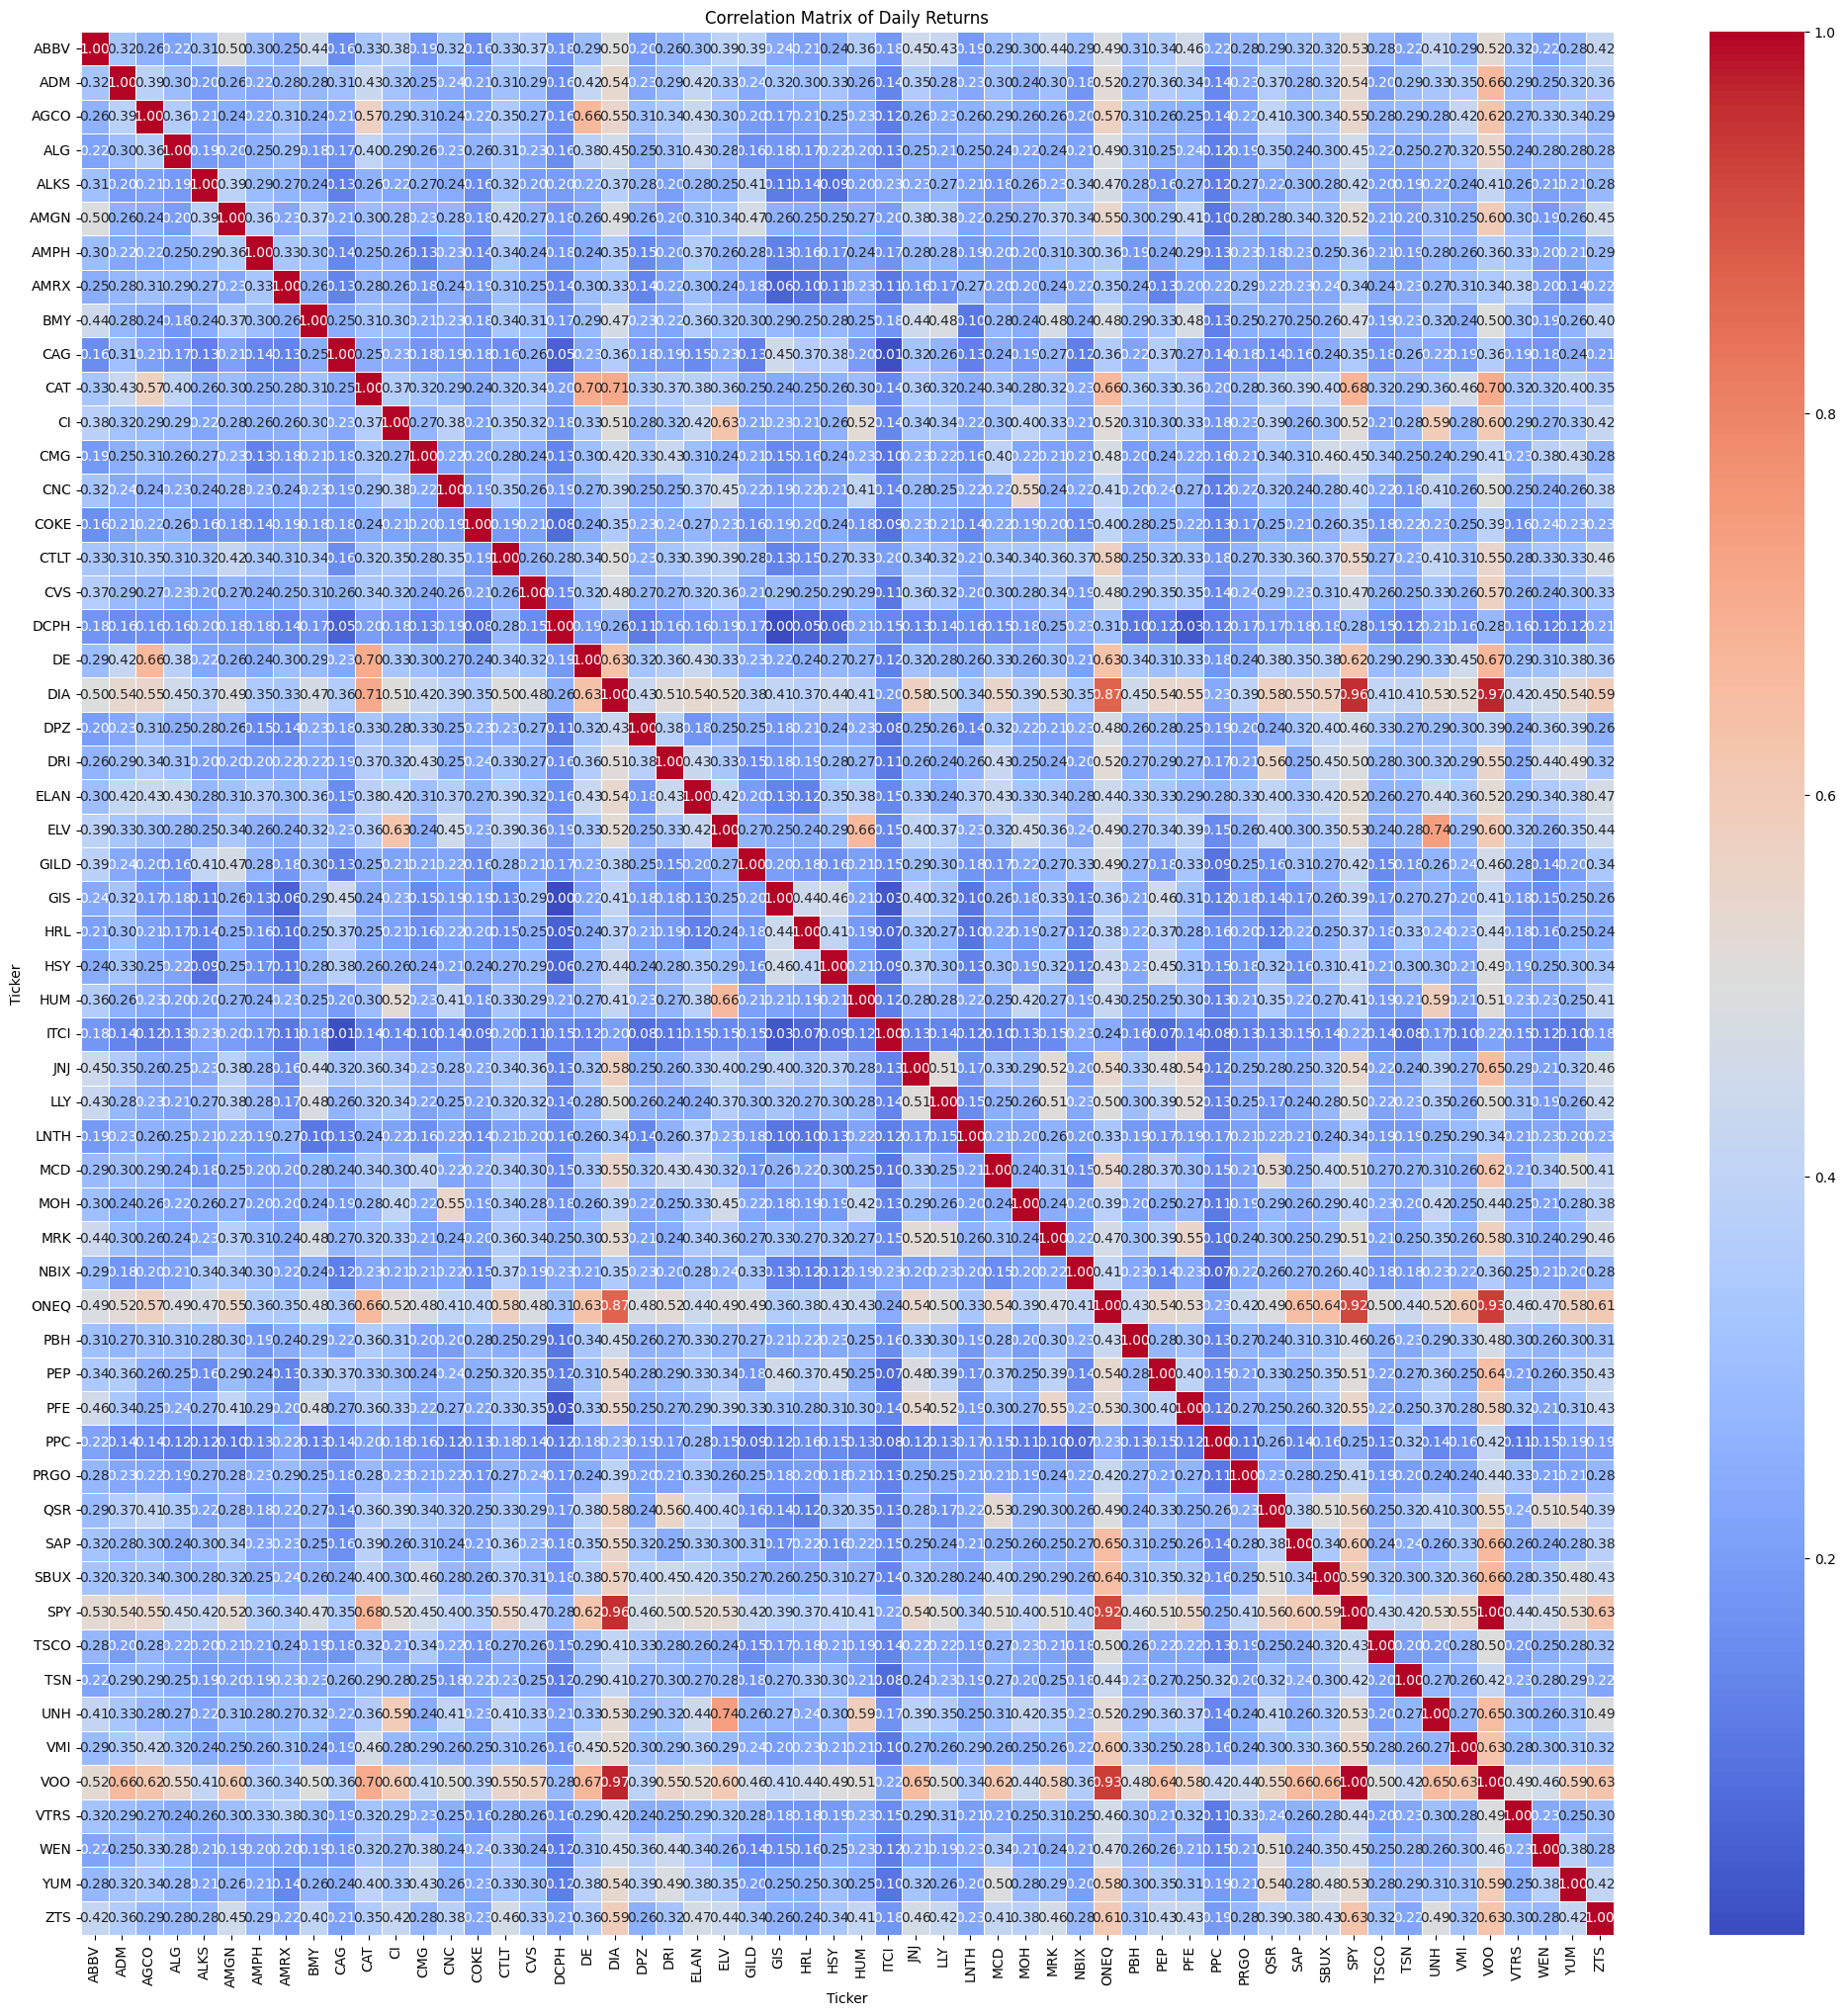

In [122]:
plt.figure(figsize=(25, 25))  # Adjust the size of the figure as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [123]:
# Find the correlated pairs with correlation > 0.8 or < -0.8
threshold = 0.7
correlated_pairs = []

# Iterate over the matrix to find the pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold or correlation_matrix.iloc[i, j] < -threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the correlated pairs
for pair in correlated_pairs:
    print(f"Pair: {pair[0]} and {pair[1]} with correlation: {pair[2]}")

Pair: CAT and DE with correlation: 0.7019846395509538
Pair: CAT and DIA with correlation: 0.7111992941884918
Pair: CAT and VOO with correlation: 0.7037595069091664
Pair: DIA and ONEQ with correlation: 0.868106100021512
Pair: DIA and SPY with correlation: 0.9605372693041199
Pair: DIA and VOO with correlation: 0.9688712245999868
Pair: ELV and UNH with correlation: 0.7363791508538647
Pair: ONEQ and SPY with correlation: 0.9212115405102381
Pair: ONEQ and VOO with correlation: 0.9339639761779677
Pair: SPY and VOO with correlation: 0.9984481331728716
